<a href="https://colab.research.google.com/github/ipavlopoulos/palit/blob/main/data/download_palit_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the repository

In [ ]:
%%capture
!git clone https://github.com/ipavlopoulos/palit.git

# Access the URLs

In [4]:
# IMPORT
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm
import pandas as pd
import skimage
import random
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
from sklearn.metrics import *
from bs4 import BeautifulSoup
import urllib.parse

In [18]:
# DOWNLOAD
cols = ["uid", "date", "url", "filename_enc"]
data = pd.read_excel("palit/data/PaLit.xlsx", usecols=cols)
data = data[cols]
print(data.shape[0])
data.sample()

255


,uid,date,url,filename_enc
229,230,577/672,http://www.bl.uk/manuscripts/Viewer.aspx?ref=p...,6thAD-7thAD_P. Grenf. II 112.png


In [19]:
# CLEAN
print('removing problematic images...')
noise = {18, 64, 66, 86, 98, 135, 140, 156}
data = data[~data.uid.isin(noise)]
print (data.shape[0])
print('removing duplicates...')
data = data.drop_duplicates("filename_enc")
print(data.shape[0])

removing problematic images...
247
removing duplicates...
242


In [20]:
print('keeping ones with the century...')
data.date = data.date.apply(lambda x: "-1,1" if x=='"-1/1"' else x)

keeping ones with the century...


In [21]:
date_fix = {'-1,1':'-1-1', '3,4':'3-4', '5,6':'5-6', '6,7':'6-7', '2,3':'2-3'}
data.date = data.date.apply(lambda x: date_fix[x] if x in date_fix else x)

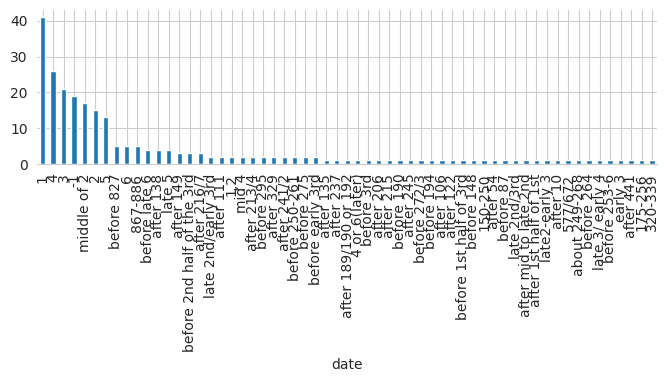

In [23]:
sns.set_style("whitegrid")
ax = data.date.value_counts().sort_values(ascending=False).plot.bar(rot=90, figsize=(8,2));
sns.despine(left=True);
ax.get_figure().savefig("centuries_plot.pdf", format="PDF", dpi=300)

In [24]:
data = data[data.date.isin({1,2,3,4})]
print(data.shape[0])

103


# Download the image of each URL
* Note that some images may need manual downloading (e.g., GSDL at the time of coding).
* In such cases, the URL of the image will be printed for you to investigate the issue.
* If your internet is slow, you may want to increase the timeout that is now set to 5''.

In [2]:
%%capture
!mkdir palit/data/PLF

In [25]:
from tqdm.notebook import tqdm
import requests
for i in tqdm(range(data.shape[0])):
  try:
    img_data = requests.get(data.iloc[i].url, timeout=5).content
    with open(f'palit/data/PLF/{data.iloc[i].filename_enc}', 'wb') as handler:
      handler.write(img_data)
  except:
    print(f'ERROR: {data.iloc[i].url}')

  0%|          | 0/10 [00:00<?, ?it/s]

ERROR: http://163.1.169.40/gsdl/collect/POxy/index/assoc/HASH0195/0e10a8e9.dir/POxy.v0058.n3916.a.01.hires.jpg
ERROR: http://163.1.169.40/gsdl/collect/POxy/index/assoc/HASH01d6/99088fbc.dir/POxy.v0045.n3264.a.01.hires.jpg
ERROR: http://163.1.169.40/gsdl/collect/POxy/index/assoc/HASH0112/947b3e81.dir/POxy.v0049.n3466.a.01.hires.jpg
ERROR: http://163.1.169.40/gsdl/collect/POxy/index/assoc/HASH016c/51c1c322.dir/POxy.v0042.n3051.a.01.hires.jpg
ERROR: http://163.1.169.40/gsdl/collect/POxy/index/assoc/HASH0198/92913d2d.dir/POxy.v0041.n2957.a.01.hires.jpg


In [ ]:
images = []
for filepath in tqdm(data.filename_enc.values):
    try:
        img = skimage.io.imread(f"palit/data/PLF/{filepath[:-4]}.jpg") # some are saved as PNGs
    except:
        img = None
    images.append(img)
data["img"] = images
data[data.img.notna()].shape